In [21]:
import math
import numpy as nm
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as nm
import pylab
import matplotlib.pyplot

tp=0.

def h1(x0,x):
    if a>=0:
        return(((r-f)*(1-nm.exp(a*(x0-x)))/(a*alpha))**(0.5))
    else:
        return(((r-f)*(nm.exp((-a)*(x-x0))-1)/((-a)*alpha))**(0.5))
def t1(x0,x,h):
    if a>=0:
        return(tp+(1./(a*alpha*(r-f))**(0.5))*nm.arctanh(h*(a*alpha/(r-f))**(0.5)))
    else:
        return(tp+(1./((-a)*alpha*(r-f))**(0.5))*nm.arctan(h*((-a)*alpha/(r-f))**(0.5)))
def hstar1():
    if a>=0:
        return(nm.tanh((tr-tp)*(a*alpha*(r-f))**(0.5))*((r-f)/(a*alpha))**(0.5))
    else:
        return(nm.tan((tr-tp)*((-a)*alpha*(r-f))**(0.5))*((r-f)/((-a)*alpha))**(0.5))
def xstar1(x0):
    if a>=0:
        return(x0+a**(-1.)*nm.log((r-f)/(r-f-a*alpha*hstar1()**2)))
    else:
        return(x0+(-a)**(-1.)*(nm.log((r-f+(-a)*alpha*hstar1()**2))-nm.log(r-f)))
def h2(t0,x,xtop):
    return(h1(xtop,x))
def t2(t0,x):
    return(t0+t1(0,x,h2(t0,x,xtop)))
def hstar2(t0):
    if a>=0:
        return(nm.tanh((tr-t0)*(a*alpha*(r-f))**(0.5))*((r-f)/(a*alpha))**(0.5))
    else:
        return(nm.tan((tr-t0)*((-a)*alpha*(r-f))**(0.5))*((r-f)/((-a)*alpha))**(0.5))
def xstar2(t0,xtop):
    if a>=0:
        return(xtop+(a**(-1.))*nm.log((r-f)/(r-f-a*alpha*hstar2(t0)**2)))
    else:
        return(xtop+(-a)**(-1.)*nm.log((r-f+(-a)*alpha*hstar2(t0)**2)/(r-f)))
def h3(xstar,x,hstar):
    if a>=0:
        return(((nm.exp(a*(xstar-x))*(f+a*alpha*hstar**2)-f)/(a*alpha))**(0.5))
    else:
        return(((-nm.exp((-a)*(x-xstar))*(f+a*alpha*hstar**2)+f)/((-a)*alpha))**(0.5))
def xzw(xstar,hstar):
    if a>=0:
        return(xstar+(a**(-1))*(nm.log((f+a*alpha*hstar**2))-nm.log(f)))
    else:
        return(xstar+(a)**(-1)*(-nm.log(f)+nm.log((f+(a)*alpha*hstar**2))))
def t3(xstar,x,hstar):
    if f==0:
        return(tr+1./(alpha*a)*(1./h3(xstar,x,hstar)-1./hstar))
    elif a>=0:
        return(tr+(a*alpha*f)**(-0.5)*(nm.arctan(hstar*(a*alpha/f)**(0.5))-nm.arctan(h3(xstar,x,hstar)*(a*alpha/f)**(0.5))))
    else:
        return(tr-((-a)*alpha*f)**(-0.5)*(nm.arctanh(h3(xstar,x,hstar)*((-a)*alpha/f)**(0.5))-nm.arctanh(hstar*((-a)*alpha/f)**(0.5))))


a =  0.02
(50, 0.02)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars


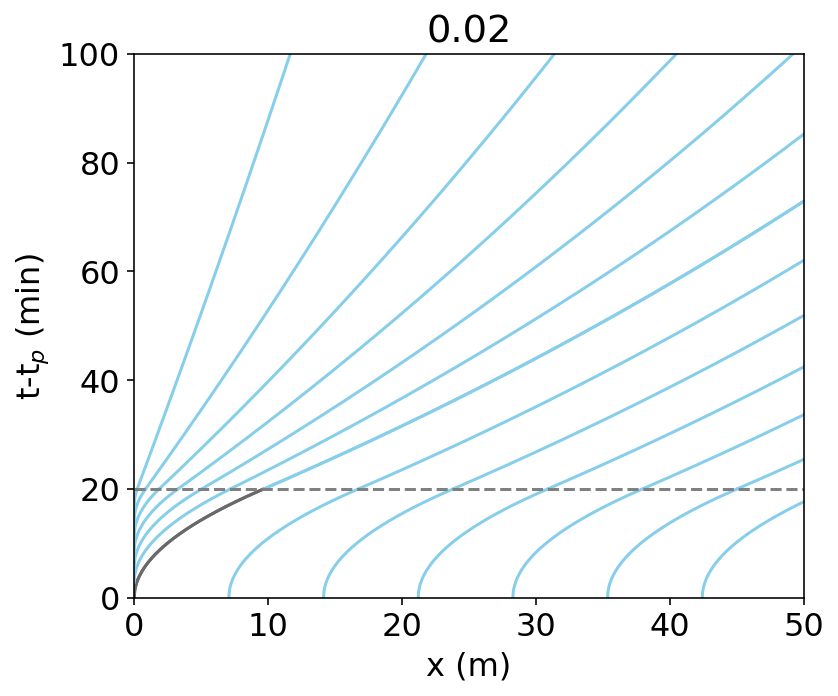

a =  1e-10
(50, 1e-10)


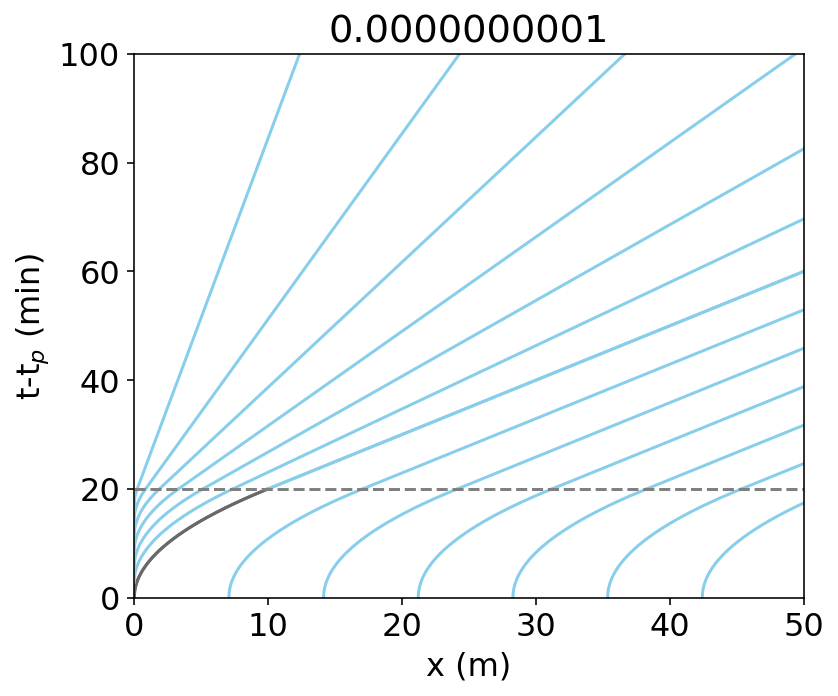

a =  -0.02
(50, -0.02)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in log


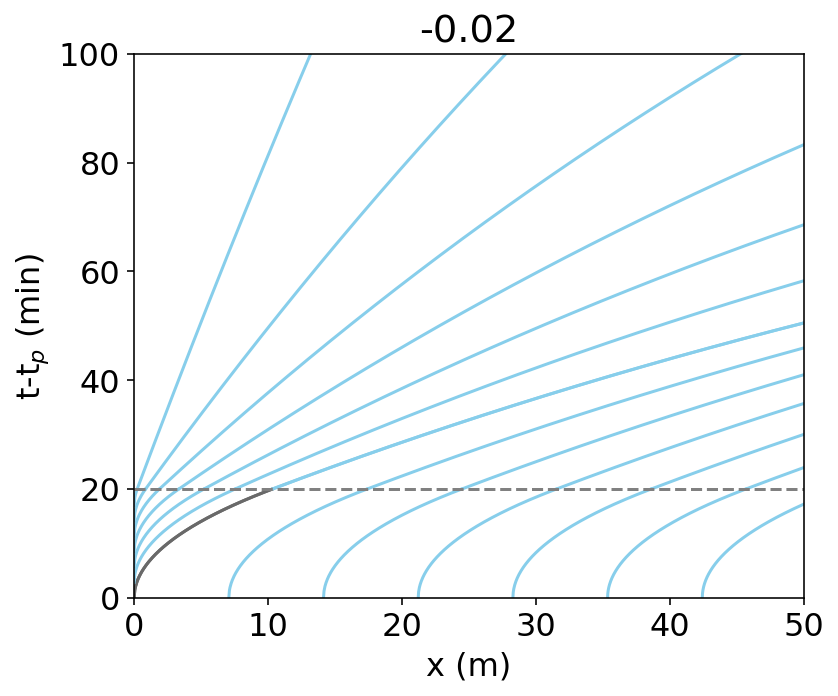

In [22]:
matplotlib.rcParams.update({'font.size': 16})
%config InlineBackend.figure_format = 'retina'

r=5./100./3600.          # rainfall rate in m/s
tr=20.*60                # end of rainstorm in seconds
f=0.                     # constant infiltration rate in m/s
alpha=0.5                # coefficient alpha=(So/n)^(1/2)

color1='skyblue'         # color for plotting characteristics
colorbold='dimgrey'      # color for limiting characteristic

alist= ['0.0000000001', '-0.02', '0.02']      # list of strings for the values of a to try
hillslopeSizeDict = {'0.0000000001':[0,50], '-0.02':[0,50], '0.02':[0,50] }  # dictionary holding values of location of divide, location of outlet
different = True         # parameter that tells the program to use hillslopeSizeDict
xend = 50.               # location of stream outlet
xtop = 0.                # location of divide

touts_tot={aval:[] for aval in alist}
houts_tot={aval:[] for aval in alist}
tout00={aval:0 for aval in touts_tot.keys()}


for aval in (touts_tot.keys()):
    plt.figure(figsize=(6,5))
    a=float(aval)
    if different == True:
        xend=hillslopeSizeDict[aval][1]
        xtop=hillslopeSizeDict[aval][0]
        print 'a = ',a   
    xstarvals = []
    hstarvals = []
    houts1 = []
    touts1 = []
    houts2 = []
    touts2 = []
    houts3 = []
    touts3 = []
    xstarplot = []
    
    print(xend,a)
    x0vals = nm.linspace(xtop,xend,100)
    for val in x0vals:
        xvals= nm.linspace(val,xend,1000) 
        hvals= h1(val,xvals) 
        tvals= t1(val,xvals,hvals)
        d=len(tvals)
        for g in range (len(tvals)):
            if tvals[g]>tr:
                if d==len(tvals):
                    d=g-1
        for g in range(len(tvals)):
            if g>d:
                tvals[g]=tvals[d]
                hvals[g]=hvals[d]
                xvals[g]=xvals[d]
        if t1(val,xend,h1(val,xend))<tr:
            houts1 = houts1+[h1(val,xend)]
            touts1 = touts1+[t1(val,xend,h1(val,xend))]
        else:
            xstarvals=xstarvals+[xstar1(val)]
            hstarvals=hstarvals+[h1(val,xstar1(val))]
        
        if val==x0vals[0]:
            pylab.plot(xvals,[t/60 for t in tvals], c=colorbold)
            xstarplot = xstarplot+[xstar1(val)]
            tout00[aval]=t1(val,xend,h1(val,xend))
        elif val in [x0vals[i*14] for i in list(range(7))]:
            pylab.plot(xvals,[t/60 for t in tvals],c=color1)
            xstarplot = xstarplot+[xstar1(val)]
    touts1.reverse()
    houts1.reverse()
    t0vals = nm.linspace(0,tr,100)

    for val in t0vals:
        xvals = nm.linspace(xtop,xend,1000)
        hvals = h2(val,xvals,xtop)
        #print(hvals)
        tvals = t2(val,xvals)
        d=len(tvals)
        for g in range(len(tvals)):
            if tvals[g]>tr:
                if d==len(tvals):
                    d=g-1
        for g in range(len(tvals)):
            if g>d:
                tvals[g]=tvals[d]
                hvals[g]=hvals[d]
                xvals[g]=xvals[d]
        if t2(val,xend)<=tr:
            houts2 = houts2+[h2(val,xend,xtop)]
            touts2 = touts2+[t2(val,xend)]
        else:
            xstarvals=[xstar2(val,xtop)]+xstarvals
            hstarvals=[h2(val,xstar2(val,xtop),xtop)]+hstarvals
        
        if val==t0vals[0]:
            pylab.plot(xvals,[t/60 for t in tvals],c=colorbold)
            xstarplot = xstarplot+[xstar2(val,xtop)]
        elif val in [t0vals[i*14] for i in list(range(7))]:
            pylab.plot(xvals,[t/60 for t in tvals],c=color1)
            xstarplot = xstarplot+[xstar2(val,xtop)]

    xzwvals=[]
    tzwvals=[]

    for i in range (len(xstarvals)):
        xvals = nm.linspace(xstarvals[i],xend,1000)
        hvals = h3(xstarvals[i],xvals,hstarvals[i])
        tvals = t3(xstarvals[i],xvals,hstarvals[i])
        d=len(tvals)
        for g in range(len(xvals)):
            if math.isnan(hvals[g]):
                if d==len(tvals):
                    d=g
                    tzwvals=tzwvals+[tvals[d-1]]
                    xzwvals=xzwvals+[xzw(xstarvals[i],hstarvals[i])]

            if xvals[g]>xzw(hstarvals[i],xstarvals[i]):
                if d==len(tvals):
                    d=g
                    tzwvals=tzwvals+[tvals[d-1]]
                    xzwvals=xzwvals+[xzw(xstarvals[i],hstarvals[i])]
        for g in range(len(tvals)):
            if g>d:
                tvals[g]=tvals[d]
                hvals[g]=hvals[d]
                xvals[g]=xvals[d]
        if f==0:
            houts3 = houts3+[h3(xstarvals[i],xend,hstarvals[i])]
            touts3 = touts3+[t3(xstarvals[i],xend,hstarvals[i])]
        if xzw(xstarvals[i],hstarvals[i])>=xend:
            houts3 = houts3+[h3(xstarvals[i],xend,hstarvals[i])]
            touts3 = touts3+[t3(xstarvals[i],xend,hstarvals[i])]
        if xvals[0] in xstarplot:
            pylab.plot(xvals,[t/60 for t in tvals],c=color1)

    houts3.reverse()
    touts3.reverse()


    houts=houts1+houts2+houts3
    touts=touts1+touts2+touts3
    
    houts_tot[aval]=houts
    touts_tot[aval]=touts
    
    
    plt.plot(xzwvals+[50],[t/60 for t in tzwvals]+[176.2],c='gray',linestyle='--')  
    plt.plot([0,xend],[tr/60,tr/60],c='gray',linestyle='--')
    plt.xlim(0,xend)
    plt.ylim(0,5*tr/60)
    plt.xlabel('x (m)')
    plt.ylabel('t-t$_p$ (min)')
    plt.title(aval)
    plt.show()


('-0.02', 'teq = ', 50.51969167877358)
('0.0000000001', 'teq = ', 20.101010755315656)
('0.02', 'teq = ', 19.906582153698)


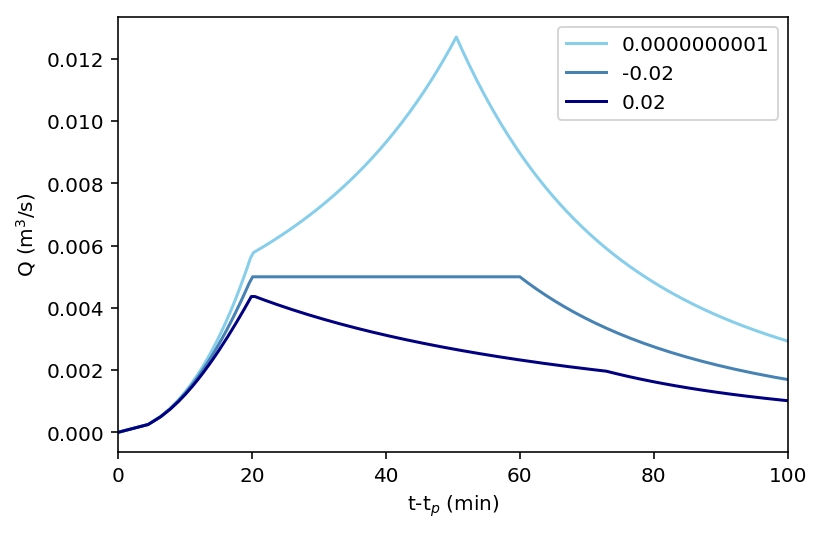

In [23]:
# you can choose to plot q or Q, not both. Set the appropriate value to True.
showq = False
showQ = True

outlet_width = {'0.0000000001':10, '-0.02':5, '0.02':20}  # dictionary of outlet widths. optional to use. To set
                                                          # all outlet widths to the same value, ignore this and set
                                                          # outletSame = True
outletSame = False                                        # key that tells the program whether you want the outlet widths
                                                          # set individually by outlet_width or the same for all set by
                                                          # the number outlet
outlet = 1.                                               # if using outlet_width, the value of outlet does not matter

#### 
matplotlib.rcParams.update({'font.size': 10})
plotnames=['e','b','d','f','g','i','k','l','m','o','p','q','r','s']
qtot={aval:0 for aval in touts_tot.keys()}
maxq={aval:0 for aval in touts_tot.
      keys()}
j=0
colorlist=['skyblue','steelblue','navy','k','b','c']
%config InlineBackend.figure_format = 'retina'
keylist = touts_tot.keys()
keylist.sort()



for aval in keylist:
    if different==True:
        xend=hillslopeSizeDict[aval][1]
        xtop=hillslopeSizeDict[aval][0]
    if outletSame == False:
        outlet = outlet_width[aval]
    qouts=[]
    Qouts=[]
    for i in range(len(houts_tot[aval])):
        Qouts= Qouts+[(alpha*(houts_tot[aval][i])**2*outlet)]
        qouts= qouts+[(alpha*(houts_tot[aval][i])**2)]
    maxv[aval]=max(velocityvals[aval])
    maxq[aval]=max(qouts)  
    tmin=[]
    for val in touts_tot[aval]:
        tmin=tmin+[float(val)/60.]
    qoutsmmhr=[]
    Qoutsmmhr = []
    for val in qouts:
        qoutsmmhr=qoutsmmhr+[(val*3600/100)]
        Qoutsmmhr=Qoutsmmhr+[(val*3600/100)]
    if showq == True:
        plotnames[j]=pylab.plot((tmin),(qoutsmmhr),colorlist[j])#c=color1)
    elif showQ == True:
        plotnames[j]=pylab.plot((tmin),(Qoutsmmhr),colorlist[j])#c=color1)
    k=0
    for i in range(len(qouts)):
        if maxq[aval]==qouts[i] and k==0:
            k=i
    print(aval, 'teq = ',touts_tot[aval][k]/60)
    j+=1

if showq ==True:
    plt.ylabel('q (m$^2$/s)')
elif showQ == True:
    plt.ylabel('Q (m$^3$/s)')
plt.xlim(0,5*tr/60)
plt.xlabel('t-t$_p$ (min)')
matplotlib.rcParams.update({'font.size': 10})
plt.legend(plotnames,labels=alist,loc='best')


plt.show()
